# Exploratory data analysis of Boston Airbnb Data

## Table of contents

* [Data Understanding](#hyperlink1)
* [Business Understanding](#hyperlink2)
* [Data Cleaning and Preparation](#hyperlink3)
* [Exploratory Analysis and Evaluation of the results](#hyperlink4)
    * [Question 1](#hyperlink5)
    * [Answer 1](#hyperlink6)
    * [Question 2](#hyperlink7)
    * [Answer 2](#hyperlink8)
    * [Question 3](#hyperlink9)
    * [Answer 3](#hyperlink10)
    * [Question 4](#hyperlink11)
    * [Answer 4](#hyperlink12)
    * [Question 5](#hyperlink13)
    * [Answer 5](#hyperlink14)
    * [Question 6](#hyperlink15)
    * [Answer 6](#hyperlink16)

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection  import train_test_split
from sklearn.linear_model import LinearRegression
from wordcloud import WordCloud
%matplotlib inline

<a id = 'hyperlink1'></a>
### Data Understanding

In [2]:
# Import datasets
calendar = pd.read_csv("./calendar.csv")
listings = pd.read_csv("./listings.csv")
reviews = pd.read_csv("./reviews.csv")

In [3]:
# Check calendar data
print("\nNumber of rows and columns in the calendar data:", calendar.shape)
calendar.head()


Number of rows and columns in the calendar data: (1308890, 4)


,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [4]:
# Check listings data
print("\nNumber of rows and columns in the listings data:", listings.shape)
listings.head()
len(listings.id.unique())


Number of rows and columns in the listings data: (3585, 95)


3585

In [5]:
# Check columns in listings dataframe
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [6]:
# Check reviews data
print("\nNumber of rows and columns in the reviews data:", reviews.shape)
reviews.head()


Number of rows and columns in the reviews data: (68275, 6)


,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


<a id = 'hyperlink2'></a>
### Business Understanding
1. How is price fluctuating over time?
2. How some of the features correlate with the pricing?
3. How to get maximum return by investing in right place/type of property?
4. How some of the features correlate with the reviews?
5. What do home owners emphasize in their descriptions?
6. What are most important things to tenants?

<a id = 'hyperlink3'></a>
### Data Cleaning and Preparation
Basic data cleaning like converting to correct data types and dropping unwanted columns and setting index to tables is performed below. Working with missing values, both quantitative and categorical will be done with each business problem being addressed.

In [7]:
# Create indexes in all datasets
calendar.set_index('listing_id', inplace=True)
reviews.set_index('id', inplace=True)
listings.set_index('id', inplace=True)

In [8]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1308890 entries, 12147973 to 14504422
Data columns (total 3 columns):
date         1308890 non-null object
available    1308890 non-null object
price        643037 non-null object
dtypes: object(3)
memory usage: 39.9+ MB


In [9]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3585 entries, 12147973 to 14504422
Data columns (total 94 columns):
listing_url                         3585 non-null object
scrape_id                           3585 non-null int64
last_scraped                        3585 non-null object
name                                3585 non-null object
summary                             3442 non-null object
space                               2528 non-null object
description                         3585 non-null object
experiences_offered                 3585 non-null object
neighborhood_overview               2170 non-null object
notes                               1610 non-null object
transit                             2295 non-null object
access                              2096 non-null object
interaction                         2031 non-null object
house_rules                         2393 non-null object
thumbnail_url                       2986 non-null object
medium_url                  

In [10]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68275 entries, 4724140 to 98550693
Data columns (total 5 columns):
listing_id       68275 non-null int64
date             68275 non-null object
reviewer_id      68275 non-null int64
reviewer_name    68275 non-null object
comments         68222 non-null object
dtypes: int64(2), object(3)
memory usage: 3.1+ MB


In [11]:
# Remove dollar and comma sign from price column and convert it to float
calendar.price = calendar.price.str.lstrip('$').str.replace(',', '').astype('float')
# Convert string date to datetime object
calendar['date'] = pd.to_datetime(calendar['date'])
calendar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1308890 entries, 12147973 to 14504422
Data columns (total 3 columns):
date         1308890 non-null datetime64[ns]
available    1308890 non-null object
price        643037 non-null float64
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 39.9+ MB


In [12]:
# Convert price column to float type after stripping dollar, comma character
listings.price = listings.price.str.lstrip('$').str.replace(',', '').astype('float')

In [13]:
# Remove columns which have only null values
listings = listings.drop(['neighbourhood_group_cleansed', 'jurisdiction_names', 'license', 'has_availability'],
                 axis=1)

In [14]:
# Drop rows with price <= 0, bathrooms < 1, bedrooms <=0, accommodates <= 0
listings = listings[listings.price > 0]
listings = listings[listings.bathrooms >= 1]
listings = listings[listings.bedrooms > 0]
listings = listings[listings.accommodates > 0]

In [15]:
# Convert number of bathrooms, bedrooms, accommodates to int
listings.bathrooms = listings.bathrooms.astype('int')
listings.bedrooms = listings.bedrooms.astype('int')
listings.accommodates = listings.accommodates.astype('int')

In [16]:
listings['bathrooms'].value_counts()

1    2664
2     546
3      33
5       5
6       4
4       3
Name: bathrooms, dtype: int64

In [17]:
# Clean city column
print(listings.city.unique())
listings[listings.city=='波士顿']

['Boston' 'Roslindale' 'Roslindale, Boston' 'Jamaica Plain' 'Brookline'
 'Jamaica Plain, Boston' 'Jamaica Plain (Boston)' 'Roxbury Crossing'
 'Jamaica Plain ' 'Jamaica Plain, MA' 'Boston (Jamaica Plain)'
 'Jamaica plain ' 'ROXBURY CROSSING' 'Mission Hill, Boston' 'boston' '波士顿'
 'Boston, Massachusetts, US' 'South End, Boston' 'Cambridge' 'East Boston'
 'east Boston ' 'Charlestown' 'Boston (Charlestown)' 'Somerville'
 'Brighton' 'Brighton ' 'Boston ' nan 'West Roxbury' 'Newton' 'Hyde Park'
 'Mattapan' 'Milton' 'Dorchester' 'dorchester, boston ' 'South Boston'
 'Allston' 'ALLSTON']


,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,...,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,
4625517,https://www.airbnb.com/rooms/4625517,20160906204935,2016-09-07,GreenT&bus stops in front of door,Super convenient :30 seconds walk to Green T a...,"Awesome area of Brookline&Boston, one block fr...",Super convenient :30 seconds walk to Green T a...,none,Connivence to almost everywhere- penguins piz...,"If you are a student, I may give you 5% off.If...",...,NaN,NaN,NaN,f,f,strict,f,f,1,NaN


In [18]:
# Drop the row with unusual city name since there is only with observation associated with it
listings.drop(index=4625517, inplace=True)

In [19]:
listings['city_cleansed'] = listings.city.copy()

In [20]:
# Clean lower and upper case
listings['city_cleansed'] = listings.city_cleansed.replace('ALLSTON', 'Allston')
listings['city_cleansed'] = listings.city_cleansed.replace('Roslindale, Boston', 'Roslindale')
listings['city_cleansed'] = listings.city_cleansed.replace('dorchester, boston ', 'Dorchester')
listings['city_cleansed'] = listings.city_cleansed.replace(['Boston ', 'boston'], 'Boston')
listings['city_cleansed'] = listings.city_cleansed.replace('east Boston ', 'East Boston')
listings['city_cleansed'] = listings.city_cleansed.replace('Boston (Charlestown)', 'Charlestown')
listings['city_cleansed'] = listings.city_cleansed.replace('ROXBURY CROSSING', 'Roxbury Crossing')
listings['city_cleansed'] = listings.city_cleansed.replace('Brighton ', 'Brighton')
listings['city_cleansed'] = listings.city_cleansed.replace(
    ['Jamaica Plain, Boston', 'Jamaica Plain (Boston)',
     'Jamaica Plain ', 'Jamaica plain ', 'Boston (Jamaica Plain)',], 'Jamaica Plain')

In [21]:
listings['city_cleansed'].unique()

array(['Boston', 'Roslindale', 'Jamaica Plain', 'Brookline',
       'Roxbury Crossing', 'Jamaica Plain, MA', 'Mission Hill, Boston',
       'Boston, Massachusetts, US', 'South End, Boston', 'Cambridge',
       'East Boston', 'Charlestown', 'Somerville', 'Brighton', nan,
       'West Roxbury', 'Newton', 'Hyde Park', 'Mattapan', 'Milton',
       'Dorchester', 'South Boston', 'Allston'], dtype=object)

In [22]:
# Replace missing values with zeros
listings.fillna(0, inplace=True)

In [23]:
# Create a new dataframe that's a copy of listings data frame
features = listings.copy()

In [24]:
# Check if there are any zeros in the response variable i.e. price, since we converted NAs to zeros.
features.shape

(3254, 91)

In [25]:
features = features[features['price'] > 0]
features.shape

(3254, 91)

All the missing values in both quantitative and categotical variables are converted to zeros. It would be a separate project to impute missing values in every column since most of the columns have missing values, and column data types are different. Categorical variables are not cleansed since they are not beign used in the analysis.

<a id = 'hyperlink4'></a>
### Exploratory Analysis and Evaluation of the results

<a id = 'hyperlink5'></a>
#### Question 1

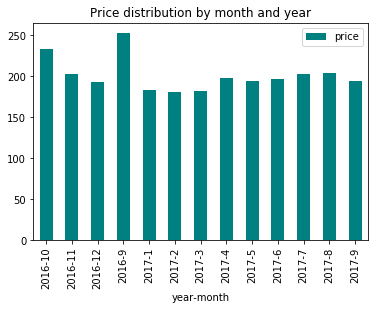

In [26]:
# Check if there are variations in prices by months
calendar['year-month'] = calendar['date'].dt.year.astype(str) + "-" + calendar['date'].dt.month.astype(str)
price_by_month = pd.DataFrame(calendar.groupby('year-month').price.mean().reset_index())
price_by_month.plot.bar(x='year-month',y='price', color = 'teal')
plt.title('Price distribution by month and year')
plt.savefig("fig1.png", bbox_inches = 'tight') # save as png

<a id = 'hyperlink6'></a>
#### Answer 1
The prices have a spike in september and october 2016 and average out in 2017 throughout the year

<a id = 'hyperlink7'></a>
#### Question 2

In [27]:
# Categorize room types
room_type_count = features.room_type.value_counts()
room_type_count

Entire home/apt    1825
Private room       1353
Shared room          76
Name: room_type, dtype: int64

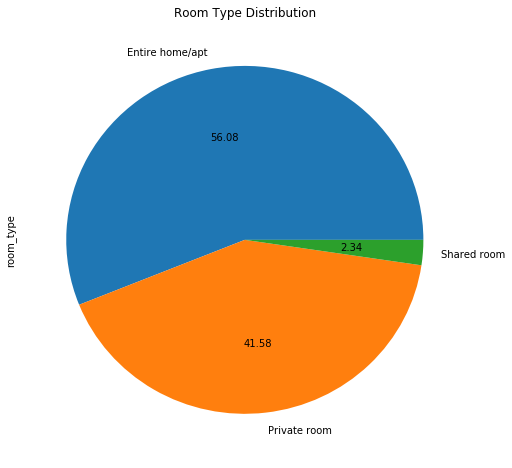

In [28]:
room_type_count.plot.pie(title = 'Room Type Distribution', figsize = (8,8), fontsize = 10, autopct = '%.2f')
plt.savefig("fig2.png", bbox_inches = 'tight') # save as png

In [29]:
# Clean property type column
print(features.property_type.unique())
features = features[features.property_type != 0]
print(features.property_type.unique())

['House' 'Apartment' 'Condominium' 'Villa' 'Bed & Breakfast' 'Townhouse'
 'Entire Floor' 'Loft' 'Guesthouse' 'Boat' 'Dorm' 'Other' 0]
['House' 'Apartment' 'Condominium' 'Villa' 'Bed & Breakfast' 'Townhouse'
 'Entire Floor' 'Loft' 'Guesthouse' 'Boat' 'Dorm' 'Other']


In [30]:
features.property_type.value_counts()

Apartment          2325
House               547
Condominium         220
Townhouse            50
Bed & Breakfast      39
Loft                 32
Other                14
Boat                 12
Villa                 6
Entire Floor          4
Dorm                  2
Guesthouse            1
Name: property_type, dtype: int64

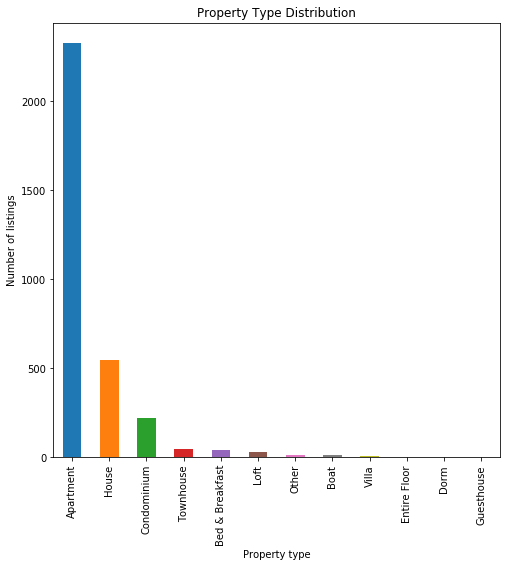

In [31]:
features.property_type.value_counts().plot.bar(title = 'Property Type Distribution', figsize = (8,8))
plt.xlabel('Property type');
plt.ylabel('Number of listings');
plt.savefig("fig3.png", bbox_inches = 'tight') # save as png

In [32]:
# Compare the prices for different room types and property types
price_data = features.groupby(['property_type','room_type']).price.mean()

In [33]:
price_data

property_type    room_type      
Apartment        Entire home/apt    234.173476
                 Private room        99.102464
                 Shared room         85.409836
Bed & Breakfast  Entire home/apt    142.500000
                 Private room       132.777778
                 Shared room         44.000000
Boat             Entire home/apt    265.200000
                 Private room       287.000000
Condominium      Entire home/apt    239.381295
                 Private room       109.000000
                 Shared room         70.000000
Dorm             Private room        62.500000
Entire Floor     Entire home/apt    154.000000
                 Private room        90.000000
Guesthouse       Entire home/apt    289.000000
House            Entire home/apt    284.219858
                 Private room        80.428212
                 Shared room         62.333333
Loft             Entire home/apt    237.500000
                 Private room        96.250000
                 Shared roo

In [34]:
def heatmap_for_price(col_list):
    '''
    This function creates heatmap of price against given combinations of features
    
    INPUT
    col_list - list of columns against which price heatmap is to be generated
    
    OUTPUT
    plt: heatmap of given size and title
    
    '''
    plt.figure(figsize=(12,12))
    sns.heatmap(features.groupby(col_list).price.mean().unstack(),annot=True, fmt=".2f");
    plt.title('Price heatmap by {}'.format(col_list))


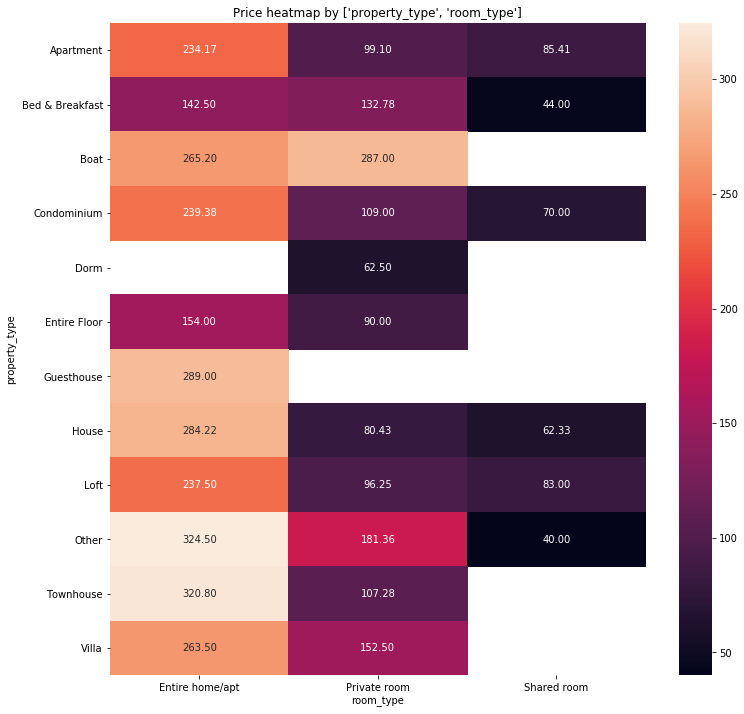

In [35]:
heatmap_for_price(['property_type', 'room_type'])
plt.savefig("fig4.png", bbox_inches = 'tight') # save as png

In [36]:
features.groupby(['neighbourhood_cleansed','room_type']).price.mean()

neighbourhood_cleansed   room_type      
Allston                  Entire home/apt    187.135802
                         Private room        74.026667
                         Shared room         82.333333
Back Bay                 Entire home/apt    283.648241
                         Private room       152.333333
                         Shared room         66.000000
Bay Village              Entire home/apt    306.368421
                         Private room       103.250000
Beacon Hill              Entire home/apt    268.491379
                         Private room       161.971429
                         Shared room        106.000000
Brighton                 Entire home/apt    168.637681
                         Private room        88.584158
                         Shared room         68.500000
Charlestown              Entire home/apt    260.790323
                         Private room       113.071429
                         Shared room         47.000000
Chinatown               

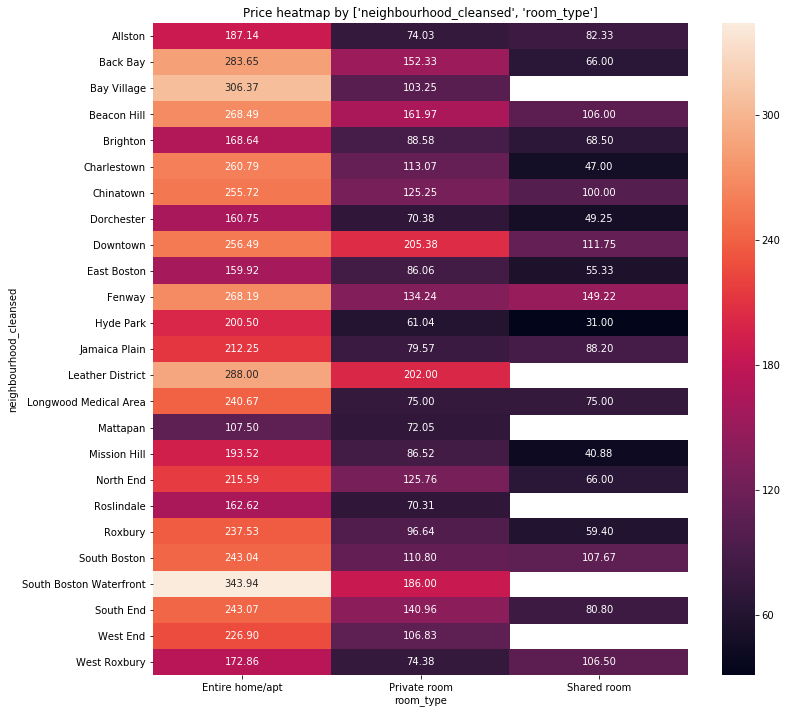

In [37]:
heatmap_for_price(['neighbourhood_cleansed','room_type'])
plt.savefig("fig5.png", bbox_inches = 'tight') # save as png

In [38]:
features.groupby(['city_cleansed','room_type']).price.mean()

city_cleansed              room_type      
0                          Private room        71.500000
Allston                    Entire home/apt    295.000000
                           Private room        70.307692
Boston                     Entire home/apt    239.248014
                           Private room        97.942135
                           Shared room         84.231884
Boston, Massachusetts, US  Shared room         50.000000
Brighton                   Entire home/apt    166.600000
                           Private room        80.272727
Brookline                  Entire home/apt    202.833333
                           Private room       104.545455
Cambridge                  Entire home/apt    257.100000
                           Private room       103.166667
Charlestown                Entire home/apt    312.090909
                           Private room       145.000000
Dorchester                 Entire home/apt    192.000000
                           Private room      

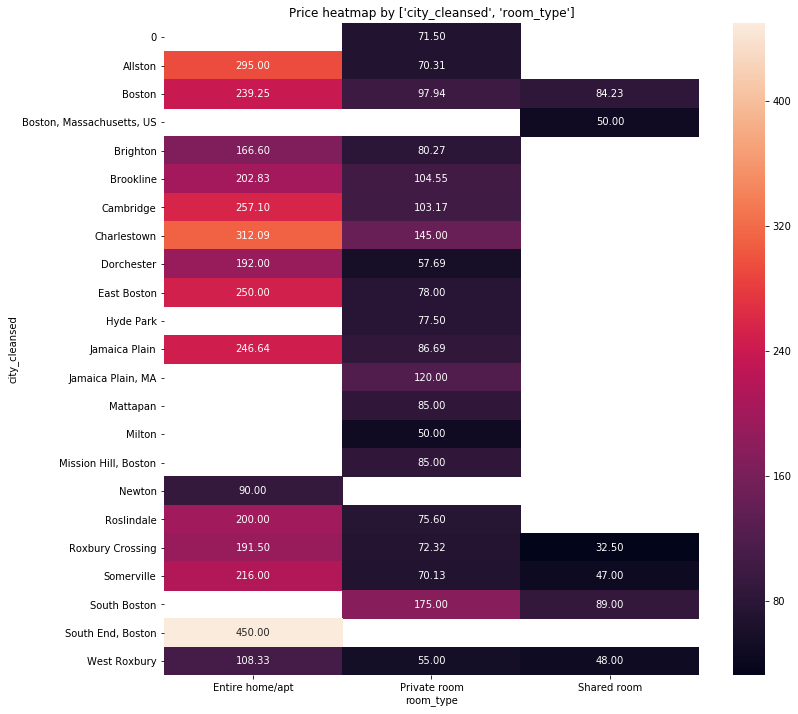

In [39]:
heatmap_for_price(['city_cleansed','room_type'])
plt.savefig("fig6.png", bbox_inches = 'tight') # save as png

<a id = 'hyperlink8'></a>
#### Answer 2
From the above plots, it can be concluded that prices of listings depends upon following factors:

1. Airbnb Boston has more number of Entire home/apt followed by Private room and then Shared room listings.

2. The type of room chosen hugely influences the price of listings. It can be analyzed that Townhouse with Entire home/apt, Guest house with Entire home/apt and Boat with Private room are the properties with maximum prices and apartments, houses take up an overwhelming majority of listings.

3. Price of a listing also depends upon the neighborhood of the property. Neighborhood such as Harvard Square, Brookline with Entire home/apt, Private room in Downtown Crossing have the peak pricing than other.

4. Entire home/apt in South End, Boston city has the highest paid listings than any other city.

<a id = 'hyperlink9'></a>
#### Question 3

In [40]:
# Average price of listings by room type
price_by_room_type = features.groupby('room_type').price.mean()
price_by_room_type.sort_values()

room_type
Shared room         81.065789
Private room        96.356509
Entire home/apt    239.097039
Name: price, dtype: float64

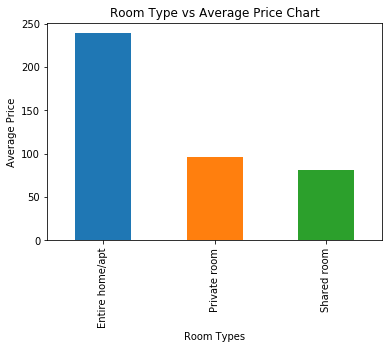

In [41]:
# Plot a graph that depicts a relation between room type and price
price_by_room_type.plot(kind='bar');
plt.xlabel('Room Types')
plt.ylabel('Average Price')
plt.title('Room Type vs Average Price Chart');
plt.savefig("fig7.png", bbox_inches = 'tight') # save as png

In [42]:
# Average price of listings by neighbourhood
price_by_neighbourhood = features.groupby('neighbourhood_cleansed').price.mean()
price_by_neighbourhood.sort_values()

neighbourhood_cleansed
Mattapan                    75.130435
Hyde Park                   87.933333
Dorchester                  91.905660
Roslindale                  99.274510
West Roxbury               106.444444
Allston                    112.894515
East Boston                118.537931
Brighton                   119.284091
Mission Hill               123.016807
Longwood Medical Area      137.125000
Jamaica Plain              139.110448
Roxbury                    146.921875
South Boston               187.304094
North End                  199.157895
Charlestown                199.666667
West End                   211.895833
South End                  213.521236
Fenway                     227.651341
Chinatown                  237.820896
Beacon Hill                241.116883
Downtown                   244.529801
Leather District           253.600000
Back Bay                   261.042017
Bay Village                271.043478
South Boston Waterfront    318.666667
Name: price, dtype: float64

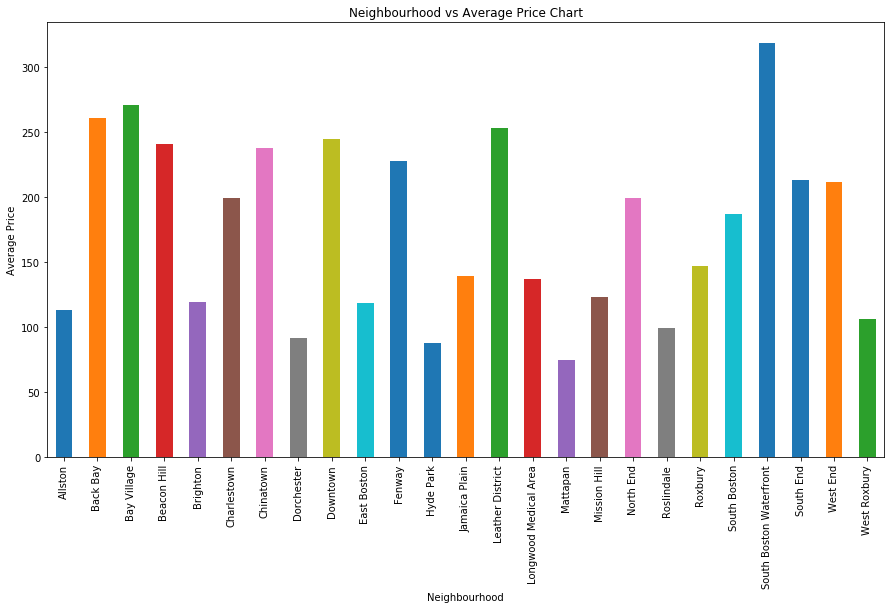

In [43]:
# Plot a graph that depicts a relation between neighbourhood and price
plt.figure(figsize=(15,8));
price_by_neighbourhood.plot(kind = 'bar')
plt.xlabel('Neighbourhood')
plt.ylabel('Average Price')
plt.title('Neighbourhood vs Average Price Chart')
plt.savefig("fig8.png", bbox_inches = 'tight') # save as png

In [44]:
# Average price of listings by cities
price_by_city = features.groupby('city_cleansed').price.mean()
price_by_city.sort_values()

city_cleansed
Milton                        50.000000
Boston, Massachusetts, US     50.000000
0                             71.500000
Dorchester                    75.600000
Hyde Park                     77.500000
Mission Hill, Boston          85.000000
Mattapan                      85.000000
West Roxbury                  85.600000
Allston                       86.357143
Newton                        90.000000
Somerville                    91.947368
Roxbury Crossing              95.851852
Roslindale                    96.333333
Brighton                     107.250000
Jamaica Plain, MA            120.000000
East Boston                  121.000000
South Boston                 132.000000
Brookline                    139.235294
Jamaica Plain                160.000000
Boston                       179.052322
Cambridge                    199.375000
Charlestown                  267.533333
South End, Boston            450.000000
Name: price, dtype: float64

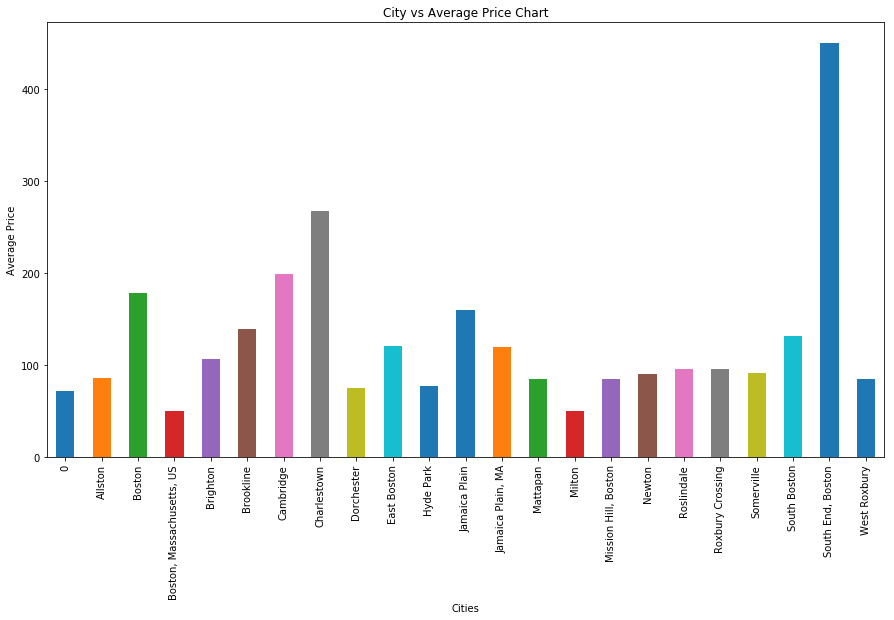

In [45]:
# Plot a graph that depicts a relation between cities and price
plt.figure(figsize=(15,8));
price_by_city.plot(kind='bar');
plt.xlabel('Cities')
plt.ylabel('Average Price')
plt.title('City vs Average Price Chart');
plt.savefig("fig9.png", bbox_inches = 'tight') # save as png

In [46]:
# Average price of listings by property types
price_by_property_type = features.groupby('property_type').price.mean()
price_by_property_type.sort_values()

property_type
Dorm                62.500000
Entire Floor       122.000000
Bed & Breakfast    131.000000
House              132.661792
Townhouse          149.980000
Apartment          185.479140
Villa              189.500000
Condominium        191.022727
Other              191.714286
Loft               192.531250
Boat               268.833333
Guesthouse         289.000000
Name: price, dtype: float64

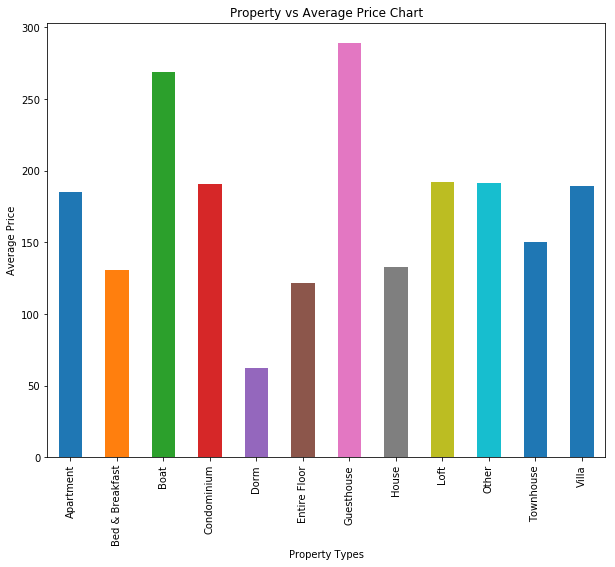

In [47]:
# Plot a graph that depicts a relation between property types and price
plt.figure(figsize=(10,8));
price_by_property_type.plot(kind='bar')
plt.xlabel('Property Types')
plt.ylabel('Average Price')
plt.title('Property vs Average Price Chart');
plt.savefig("fig10.png", bbox_inches = 'tight') # save as png

In [48]:
# Average price of listings by street
price_by_street = features.groupby('street').price.mean()
price_by_street.sort_values()

street
Burney Street, Roxbury Crossing, MA 02120, United States             20.000000
Rockvale Circle, Boston, MA 02130, United States                     22.000000
milk street, Boston, Massachusetts, US, MA 02169, United States      25.000000
C Smith St, Boston, MA 02120, United States                          27.000000
Smith Street, Boston, MA 02120, United States                        28.000000
Saint Marys Street, Boston, MA 02215, United States                  30.000000
Stockton Street, Boston, MA 02124, United States                     30.750000
Forest Street, Boston, MA 02119, United States                       31.500000
Payson Avenue, Boston, MA 02125, United States                       35.000000
Boston, MA 02121, United States                                      35.000000
Holworthy St, Boston, MA, United States                              35.000000
Welles Avenue, Boston, MA 02124, United States                       35.000000
HARVARD TERRACE, ALLSTON, MA 02134, United St

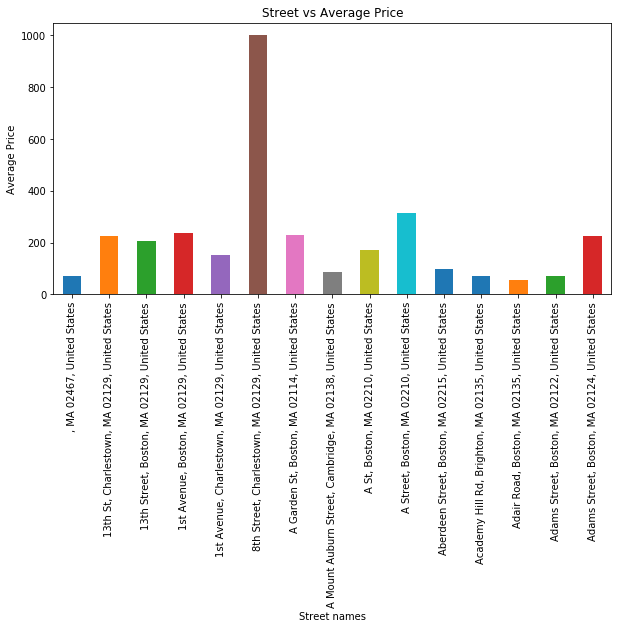

In [49]:
# Plot a graph that depicts a relation between streets and price
plt.figure(figsize=(10,5));
price_by_street[:15].plot(kind='bar');
plt.xlabel('Street names')
plt.ylabel('Average Price')
plt.title('Street vs Average Price');
plt.savefig("fig11.png", bbox_inches = 'tight')

<a id = 'hyperlink10'></a>
#### Answer 3
1. Apparently, average price of entire home/apt is maximum compared to private room or shared room. In order to generate more revenue it is wise to list entire home or apartment in Airbnb rather than individual rooms.

2. South Boston Waterfront followed by Bay Village, Back Bay and Leather District seem to have more average price than other neighbourhoods. Also, an entire home or apartment in South Boston particularly can generate a hefty revenue than any other combination could.

3. It is more likely from the figure that South End, Boston has got a huge spike in pricing and generates a remarkable revenue if invested here. Other cities didn't make it near to South End but Charlestown area seems fairly expensive and can generate a considerable revenue as well.

4. Properties like Guesthouse and Boat are darn expensive and it's pretty much clear that these generate revenue in huge numbers if someone is interested to invest in these properties.

5. When analyzed in much lower level, streets such as Mythle, Boston Wharf Road, Congress streets touch a peak price.

<a id = 'hyperlink11'></a>
#### Question 4

In [50]:
np.sort(features.review_scores_rating.unique())

array([   0.,   20.,   40.,   46.,   47.,   48.,   50.,   53.,   55.,
         60.,   64.,   65.,   66.,   67.,   68.,   69.,   70.,   71.,
         72.,   73.,   74.,   75.,   76.,   77.,   78.,   79.,   80.,
         81.,   82.,   83.,   84.,   85.,   86.,   87.,   88.,   89.,
         90.,   91.,   92.,   93.,   94.,   95.,   96.,   97.,   98.,
         99.,  100.])

In [51]:
# Average review score of listings by neighbourhood
ratings_by_neighbourhood = features.groupby(
    ['neighbourhood_cleansed', 'property_type']).review_scores_rating.mean()
ratings_by_neighbourhood .sort_values()

neighbourhood_cleansed   property_type  
Dorchester               Loft                 0.000000
Jamaica Plain            Entire Floor         0.000000
Allston                  Villa                0.000000
Longwood Medical Area    Loft                 0.000000
Dorchester               Entire Floor         0.000000
Charlestown              Townhouse            0.000000
Roxbury                  Loft                 0.000000
                         Entire Floor         0.000000
Fenway                   Bed & Breakfast      0.000000
Longwood Medical Area    Apartment           19.200000
Downtown                 Other               25.000000
                         Villa               25.000000
Beacon Hill              Bed & Breakfast     26.666667
Bay Village              House               32.800000
South End                Bed & Breakfast     40.000000
Fenway                   Condominium         42.375000
Mattapan                 Apartment           43.750000
West Roxbury            

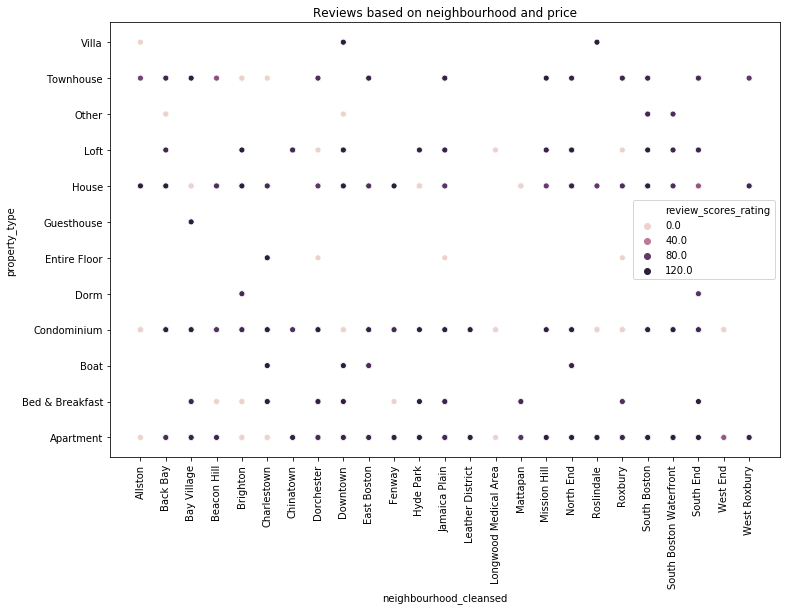

In [52]:
# Plot a graph that depicts a relation between neighbourhood and review score
plt.figure(figsize = (12,8))
sns.scatterplot(x='neighbourhood_cleansed', y='property_type', hue='review_scores_rating', data=features);
plt.xticks(rotation=90);
plt.title('Reviews based on neighbourhood and price');
plt.savefig("fig12.png", bbox_inches = 'tight')

In [53]:
# Average review score of listings by property types
ratings_by_property_type = features.groupby('property_type').review_scores_rating.mean()
ratings_by_property_type.sort_values()

property_type
Entire Floor        25.000000
Villa               33.166667
Other               49.928571
Bed & Breakfast     66.871795
Apartment           68.781505
Condominium         72.600000
House               78.661792
Townhouse           79.440000
Loft                81.406250
Boat                83.833333
Dorm                86.500000
Guesthouse         100.000000
Name: review_scores_rating, dtype: float64

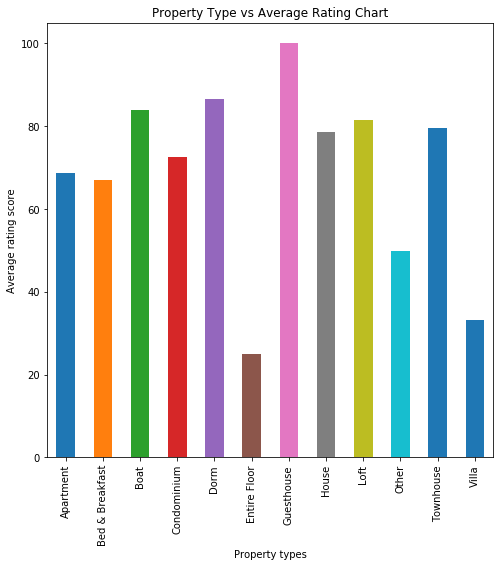

In [54]:
# Plot a graph that depicts a relation between property type and review score
plt.figure(figsize = (8,8))
ratings_by_property_type.plot(kind='bar');
plt.xlabel('Property types')
plt.ylabel('Average rating score')
plt.title('Property Type vs Average Rating Chart');
plt.savefig("fig13.png", bbox_inches = 'tight')

In [55]:
# Average review score of listings by property types with number of bedrooms
ratings_by_bedrooms = features.groupby(['property_type', 'bedrooms']).review_scores_rating.mean()
ratings_by_bedrooms.sort_values()

property_type    bedrooms
Entire Floor     2             0.000000
Apartment        5            32.166667
Villa            1            33.166667
Condominium      4            41.500000
Other            1            49.928571
Entire Floor     1            50.000000
Bed & Breakfast  1            66.105263
Apartment        2            66.277580
Boat             1            66.666667
Apartment        1            69.339450
Condominium      2            72.032258
                 1            72.520548
Apartment        3            73.485714
House            2            75.931818
Townhouse        1            77.045455
House            1            78.159722
                 3            78.641026
Loft             1            78.954545
Condominium      3            81.000000
Apartment        4            81.764706
Loft             2            86.444444
Dorm             1            86.500000
House            4            88.040000
Boat             2            89.000000
Loft          

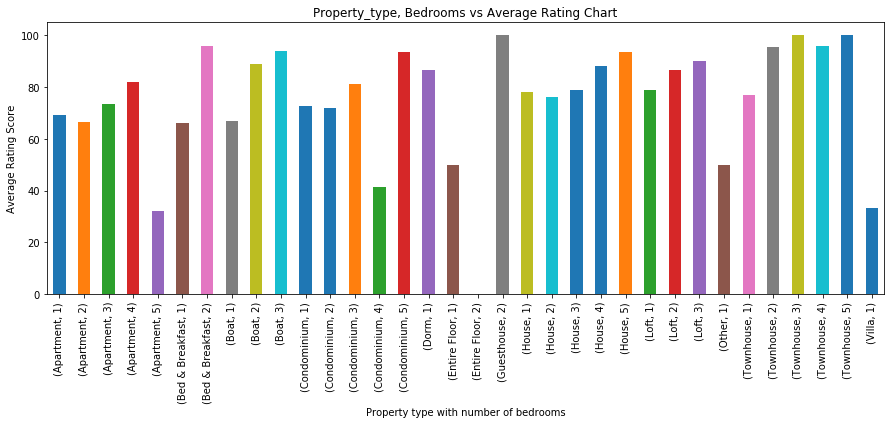

In [56]:
# Plot a graph that depicts a relation between property type with number of bedrooms and review score
plt.figure(figsize=(15, 5))
ratings_by_bedrooms.plot(kind='bar');
plt.xlabel('Property type with number of bedrooms')
plt.ylabel('Average Rating Score')
plt.title('Property_type, Bedrooms vs Average Rating Chart');
plt.savefig("fig14.png", bbox_inches = 'tight')

In [57]:
# Average review score of listings by property types with number of bathrooms
ratings_by_bathroom = features.groupby(['property_type', 'bathrooms']).review_scores_rating.mean()
ratings_by_bathroom.sort_values()

property_type    bathrooms
Entire Floor     2              0.000000
Apartment        5              0.000000
Condominium      3              0.000000
Villa            1             20.000000
Other            1             33.333333
Entire Floor     1             33.333333
Other            5             42.500000
Apartment        2             58.393491
Bed & Breakfast  1             62.558824
Apartment        3             64.333333
                 1             70.617766
Condominium      1             71.977778
Loft             2             74.000000
Townhouse        2             76.090909
Condominium      2             77.333333
House            1             77.981818
                 2             78.291667
Townhouse        1             80.384615
Boat             1             80.777778
Loft             1             82.185185
Other            6             82.250000
Dorm             1             86.500000
Loft             3             90.000000
Boat             2            

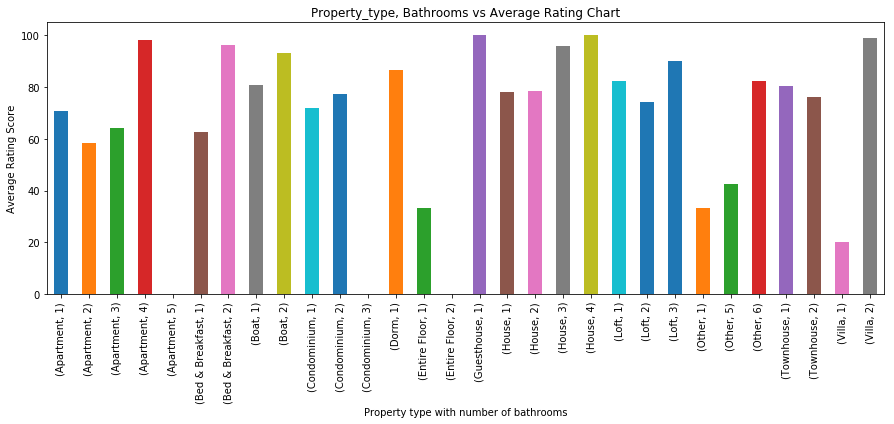

In [58]:
# Plot a graph that depicts a relation between property type with number of bathrooms and review score
plt.figure(figsize=(15, 5))
ratings_by_bathroom.plot(kind='bar');
plt.xlabel('Property type with number of bathrooms')
plt.ylabel('Average Rating Score')
plt.title('Property_type, Bathrooms vs Average Rating Chart');
plt.savefig("fig15.png", bbox_inches = 'tight')

<a id = 'hyperlink12'></a>
#### Answer 4

1. From the data it is obvious that people enjoy living in Guesthouses, Dorm, Boats and Lofts depending on their interests and budgets.

2. There seems to be Guesthouse with only 2 bedrooms in listings data and these are likely to get the highest review score. People are also comfortable with Townhouse and Boats with more than two bedrooms. However, they are not quite satisfied with Villa's experiences as they have got the least review score.

3. Again, guesthouse takes the first place along with houses with at least three bathrooms and villas with two.

<a id = 'hyperlink13'></a>
#### Question 5

In [59]:
# Define a function to generate wordcloud.
from functools import reduce
def generate_wordcould(text_list):
    """generate and visulize a text vector that in list-like form
    
       INPUT
       text_list - a list of strings
       OUTPUT
       plt - a plot showing text occurances (text size is directly proportional to frequency)
    """
    text = reduce((lambda x, y: x+y), text_list)
    wordcloud = WordCloud(max_font_size=40).generate(text)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

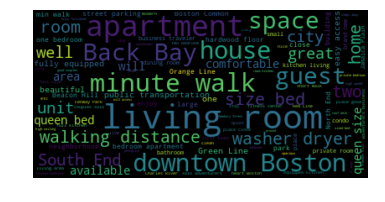

In [60]:
# Get vocabulary of reviews from house descriptions.
generate_wordcould(listings['description'])

<a id = 'hyperlink14'></a>
#### Answer 5
Home owners emphasize room types, property types, neighborhood, proximity to some locations/ transportation centers. bed sizes, comfort, in unit accommodations (washer dryer) are another key points.

<a id = 'hyperlink15'></a>
#### Question 6

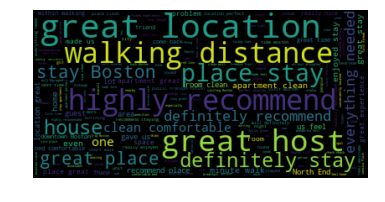

In [61]:
# get vocabulary of reviews from df_reviews
reviews = reviews[reviews['comments'].notnull()]
generate_wordcould(reviews['comments'])

<a id = 'hyperlink16'></a>
#### Answer 6
Tenants however comment in their reviews about likelihood to recommend, how the host, and location was, proximity to some tourist spot or transportation center.
They also talk about cleanliness of apartment or rooms.